<a href="https://colab.research.google.com/github/napsternxg/ipython-notebooks/blob/master/Lightweight_coreset_construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Paper: https://las.inf.ethz.ch/files/bachem18scalable.pdf


Require: Set of data points $X$, coreset size $m$

* $\mu$ ← mean of $X$
* for $x \in X$ do
  * $q(x) = \frac{1}{2} * \frac{1}{|X|} + \frac{1}{2} * \frac{d(x, \mu)^2}{\sum_{x' \in X} d(x', \mu)^2}$
* end for
* $C$ ← sample $m$ weighted points from $X$ where each point $x$ has weight $\frac{1}{m*q(x)}$ and is sampled with probability $q(x)$
* Return lightweight coreset $C$



Other resources: 
* https://github.com/microsoft/goodpoints
* http://stanford.edu/~lmackey/papers/thinning-slides.pdf
* http://stein-thinning.org/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
N, d = 1000, 2
k_true = 5
noise_ratio = 0.05
mu_true = np.random.randn(1, k_true, d)
membership_idx = np.random.randint(k_true, size=(N,1))
z_i = (membership_idx == np.arange(k_true))[:, :, np.newaxis]
# Mixture distribution
X = (np.random.randn(N, k_true, d)*noise_ratio  + (z_i * mu_true)).sum(axis=1)
(z_i * mu_true).shape, X.shape

((1000, 5, 2), (1000, 2))

In [ ]:
z_i.sum(axis=0)

array([[183],
       [192],
       [202],
       [228],
       [195]])

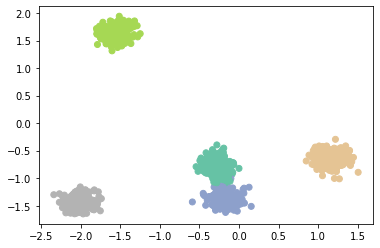

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=membership_idx, cmap="Set2")

In [ ]:
def get_coresets(X, m):
  mu = X.mean(axis=-1, keepdims=True)
  n = X.shape[0]
  print(n, mu.shape)
  d = np.linalg.norm(X - mu, axis=-1)**2
  print(d.shape)
  d_total = d.sum()
  d = d / d_total
  print(d_total.shape)
  q = 0.5*((1/n) + d)
  print(q.shape)
  idx = np.random.choice(n, size=m, replace=True)
  C = X[idx]
  w = 1/(m*q[idx])
  return C, w, q, mu

In [ ]:
m = 10
C, w, d, mu = get_coresets(X, m)

1000 (1000, 1)
(1000,)
()
(1000,)


In [ ]:
d.sum()

1.0

(array([435., 158., 165.,  38.,   2.,   0.,  18.,  78.,  80.,  26.]),
 array([0.00050211, 0.0006993 , 0.00089648, 0.00109366, 0.00129084,
        0.00148803, 0.00168521, 0.00188239, 0.00207958, 0.00227676,
        0.00247394]),
 <a list of 10 Patch objects>)

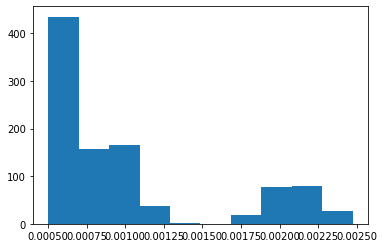

In [ ]:
plt.hist(d, bins=10)

In [ ]:
def get_random_samples(X, m):
  n = X.shape[0]
  idx = np.random.choice(n, size=m, replace=True)
  C = X[idx]
  w = np.ones_like(idx)*(n/m)
  return C, w

In [ ]:
m = 20
Cr, wr = get_random_samples(X, m)

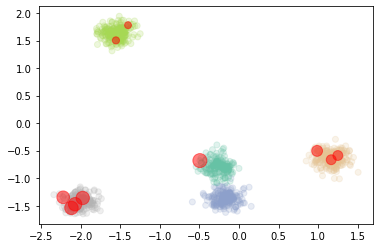

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=membership_idx, cmap="Set2", alpha=0.2)
plt.scatter(C[:, 0], C[:, 1], c="r", s=w, alpha=0.5)

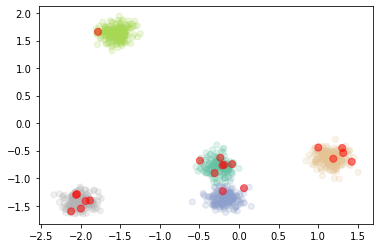

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=membership_idx, cmap="Set2", alpha=0.2)
plt.scatter(Cr[:, 0], Cr[:, 1], c="r", s=wr, alpha=0.5)